# Exploratory Data Analysis

In [140]:
#Importing necessarry libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [141]:
#Importing data-sets

df_order_products_train = pd.read_csv("/Users/data/Desktop/instacart-market-basket-analysis/csvs/order_products__train.csv")
df_order_products_prior = pd.read_csv("/Users/data/Desktop/instacart-market-basket-analysis/csvs/order_products__prior.csv")
df_orders = pd.read_csv("/Users/data/Desktop/instacart-market-basket-analysis/csvs/orders.csv")
df_products =pd.read_csv("/Users/data/Desktop/instacart-market-basket-analysis/csvs/products.csv")
df_aisles = pd.read_csv("/Users/data/Desktop/instacart-market-basket-analysis/csvs/aisles.csv")
df_departments = pd.read_csv("/Users/data/Desktop/instacart-market-basket-analysis/csvs/departments.csv")

In [142]:
#unique products counts in products data set

print("Unique products: {}".format(len(df_products.product_id.unique())))

Unique products: 49688


In [143]:
#unique users counts in products data set

print("Unique users: {}".format(len(df_orders.user_id.unique())))

Unique users: 206209


In [144]:
print(df_order_products_train.info()) 
print(df_order_products_prior.info())
print(df_orders.info())
print(df_products.info())
print(df_aisles.info())
print(df_departments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                in

The dataset contains 3421083 orders from 206209 different users.  49688 different products have been purchased.

In [145]:
print(df_order_products_train.describe()) 
print(df_order_products_prior.describe())
print(df_orders.describe())
print(df_products.describe())
print(df_aisles.describe())
print(df_departments.describe())

           order_id    product_id  add_to_cart_order     reordered
count  1.384617e+06  1.384617e+06       1.384617e+06  1.384617e+06
mean   1.706298e+06  2.555624e+04       8.758044e+00  5.985944e-01
std    9.897326e+05  1.412127e+04       7.423936e+00  4.901829e-01
min    1.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00
25%    8.433700e+05  1.338000e+04       3.000000e+00  0.000000e+00
50%    1.701880e+06  2.529800e+04       7.000000e+00  1.000000e+00
75%    2.568023e+06  3.794000e+04       1.200000e+01  1.000000e+00
max    3.421070e+06  4.968800e+04       8.000000e+01  1.000000e+00
           order_id    product_id  add_to_cart_order     reordered
count  3.243449e+07  3.243449e+07       3.243449e+07  3.243449e+07
mean   1.710749e+06  2.557634e+04       8.351076e+00  5.896975e-01
std    9.873007e+05  1.409669e+04       7.126671e+00  4.918886e-01
min    2.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00
25%    8.559430e+05  1.353000e+04       3.000000e+00  0.000000

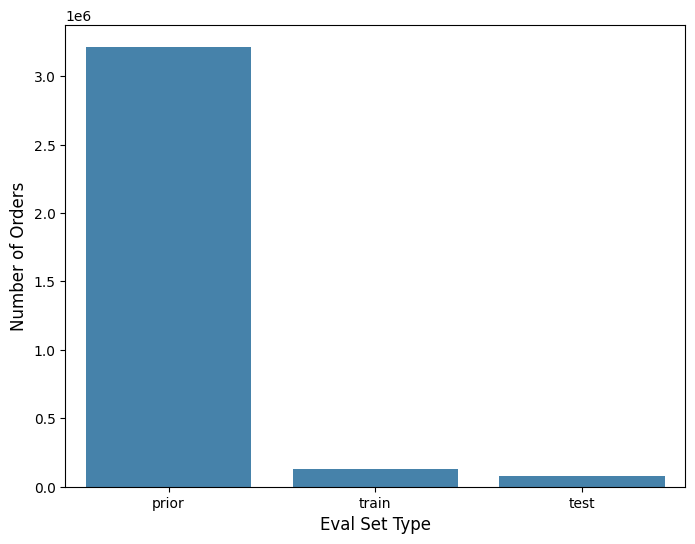

In [146]:
# Figure - 1

eval_cnt = df_orders.eval_set.value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=eval_cnt.index, y=eval_cnt.values, alpha = 0.9, color=color[0])
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Eval Set Type', fontsize=12)
plt.show()

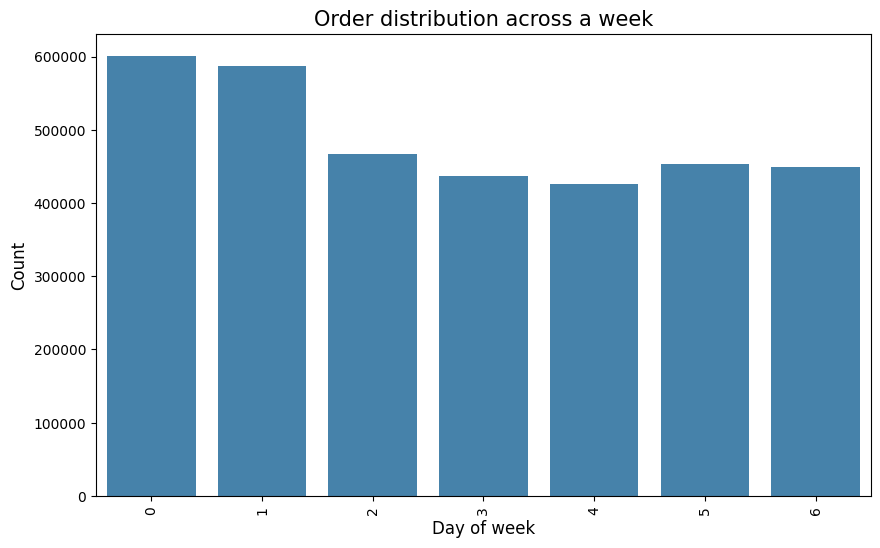

In [147]:
# Figure - 2
plt.figure(figsize=(10,6))
sns.countplot(x="order_dow", data=df_orders,alpha=0.9, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Order distribution across a week", fontsize=15)
plt.show()

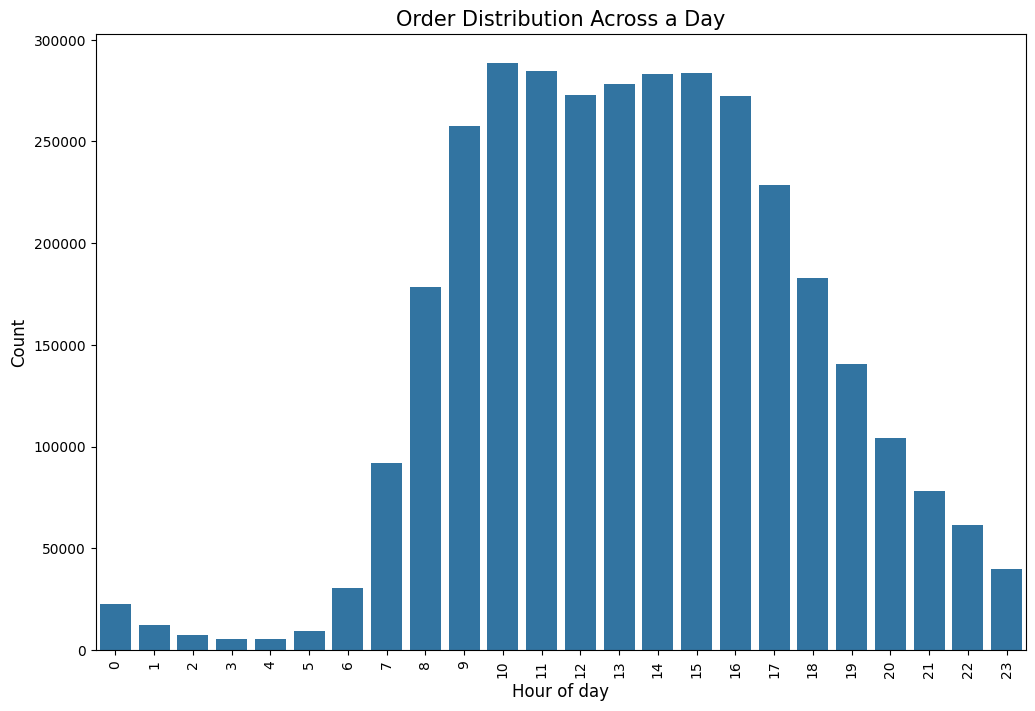

In [148]:
#Figure - 3
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=df_orders, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Order Distribution Across a Day", fontsize=15)
plt.show()

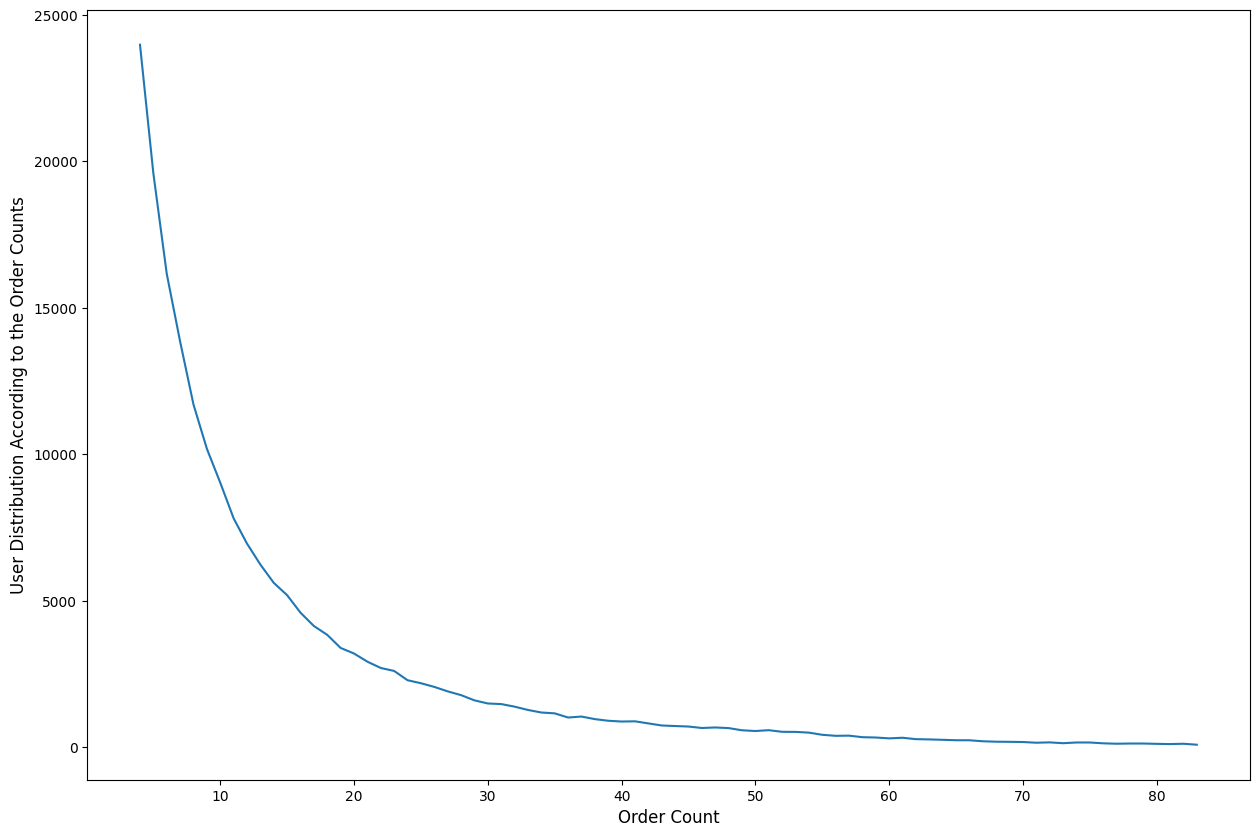

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# 
order_length_cnt = df_orders.groupby("user_id")["order_number"].aggregate('max').value_counts()
order_length_cnt_sorted = order_length_cnt.sort_index()  # Sipariş sayısına göre sırala
cut_off = 80

# 
plt.figure(figsize=(15, 10))
sns.lineplot(x=order_length_cnt_sorted.index[:cut_off], y=order_length_cnt_sorted.values[:cut_off], color=color[0])
plt.ylabel('User Distribution According to the Order Counts', fontsize=12)
plt.xlabel('Order Count', fontsize=12)
plt.show()


In [150]:
#Figure - 5
temp = pd.merge(df_departments, df_products, how='left',on = 'department_id')
print(temp)

product_count = temp.groupby('department')['product_id'].nunique()
product_count

       department_id department  product_id  \
0                  1     frozen           4   
1                  1     frozen           8   
2                  1     frozen          12   
3                  1     frozen          18   
4                  1     frozen          30   
...              ...        ...         ...   
49683             21    missing       49553   
49684             21    missing       49575   
49685             21    missing       49641   
49686             21    missing       49664   
49687             21    missing       49669   

                                            product_name  aisle_id  
0      Smart Ones Classic Favorites Mini Rigatoni Wit...        38  
1                      Cut Russet Potatoes Steam N' Mash       116  
2                             Chocolate Fudge Layer Cake       119  
3                    Pizza for One Suprema  Frozen Pizza        79  
4             Three Cheese Ziti, Marinara with Meatballs        38  
...                  

department
alcohol            1054
babies             1081
bakery             1516
beverages          4365
breakfast          1115
bulk                 38
canned goods       2092
dairy eggs         3449
deli               1322
dry goods pasta    1858
frozen             4007
household          3085
international      1139
meat seafood        907
missing            1258
other               548
pantry             5371
personal care      6563
pets                972
produce            1684
snacks             6264
Name: product_id, dtype: int64

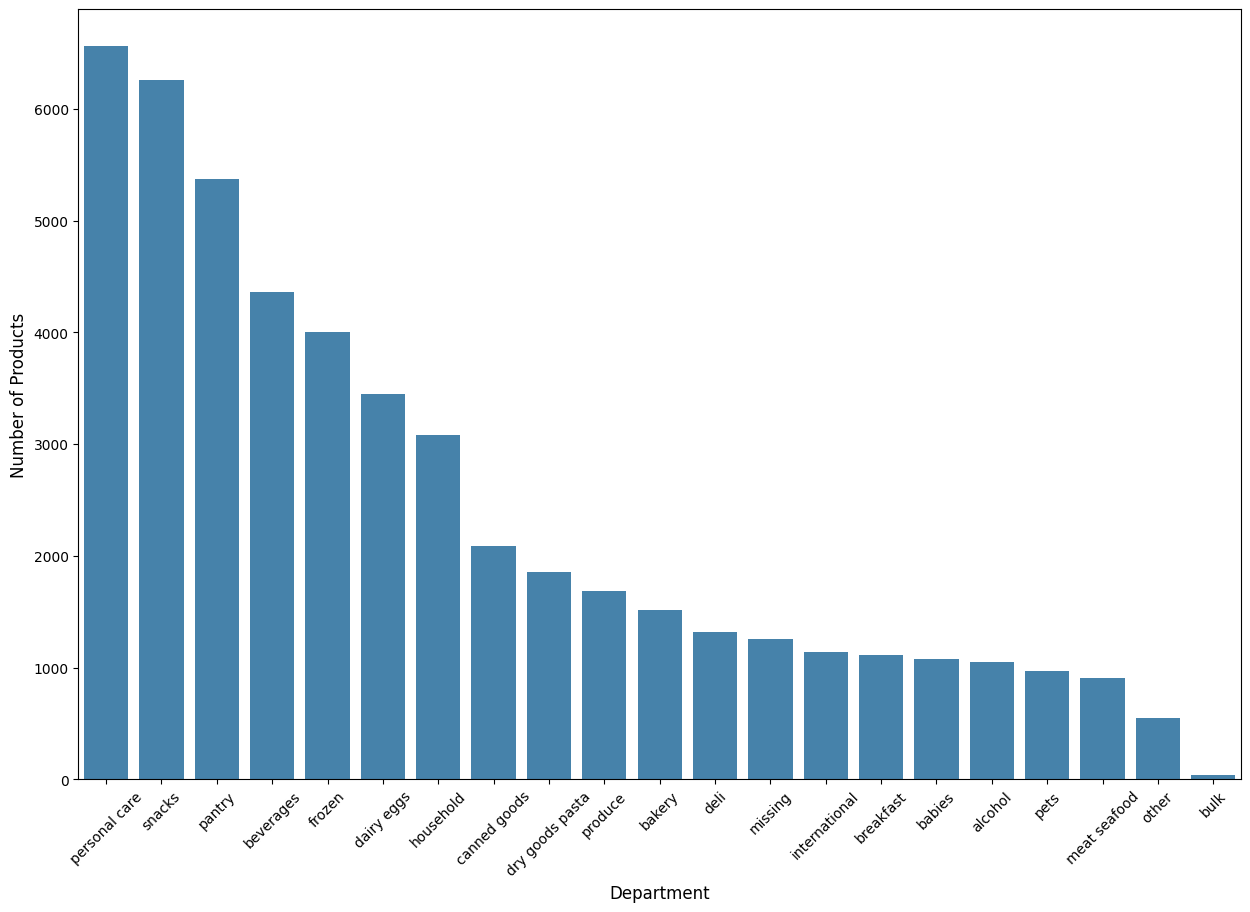

In [151]:
# Figure - 5

import matplotlib.pyplot as plt
import seaborn as sns

# Pandas Series'i değerlere göre sırala
sorted_counts = product_count.sort_values(ascending=False)

departments = sorted_counts.index.tolist()
counts = sorted_counts.values

plt.figure(figsize=(15, 10))
sns.barplot(x=departments, y=counts, alpha=0.9)
plt.ylabel('Number of Products', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation=45)
plt.show()


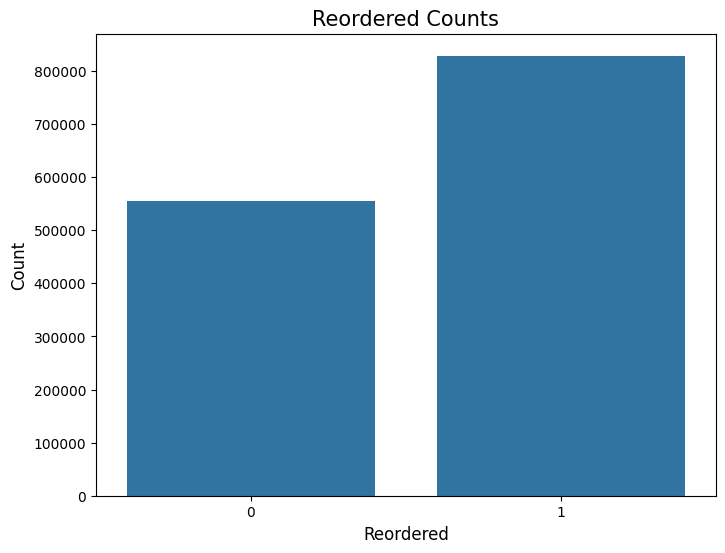

In [152]:
# Figure - 6
#Reordered Plot on the train orders or the recent orders
temp = df_order_products_train['reordered'].value_counts()
temp_df = pd.DataFrame(temp).reset_index()
temp_df.columns = ['Reordered', 'Count']

# 
plt.figure(figsize=(8, 6))
sns.barplot(x='Reordered', y='Count', data=temp_df)
plt.xlabel('Reordered', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Reordered Counts', fontsize=15)
plt.show()


In [153]:
#eval - set distrubution

df_orders.groupby("eval_set")["user_id"].unique().apply(len)

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

Out of the 206209 users, the last purchase of 131209 users are given as training, and the rest 75000 users are given as targets for prediction.

In [154]:
# We Calculate average number of orders

print("Average number of orders for users:{}".format(df_orders.groupby("user_id")["order_number"].aggregate(max).mean()))


Average number of orders for users:16.590367054784224


/var/folders/wz/1dc388d16yj3tv2tpcbmbv100000gp/T/ipykernel_1653/3069812356.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  print("Average number of orders for users:{}".format(df_orders.groupby("user_id")["order_number"].aggregate(max).mean()))


/var/folders/wz/1dc388d16yj3tv2tpcbmbv100000gp/T/ipykernel_1653/1073263804.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  basket_size_cnt = df_order_products_prior.groupby("order_id")["add_to_cart_order"].aggregate(max).value_counts()


Text(0.5, 0, 'Number of products in one order')

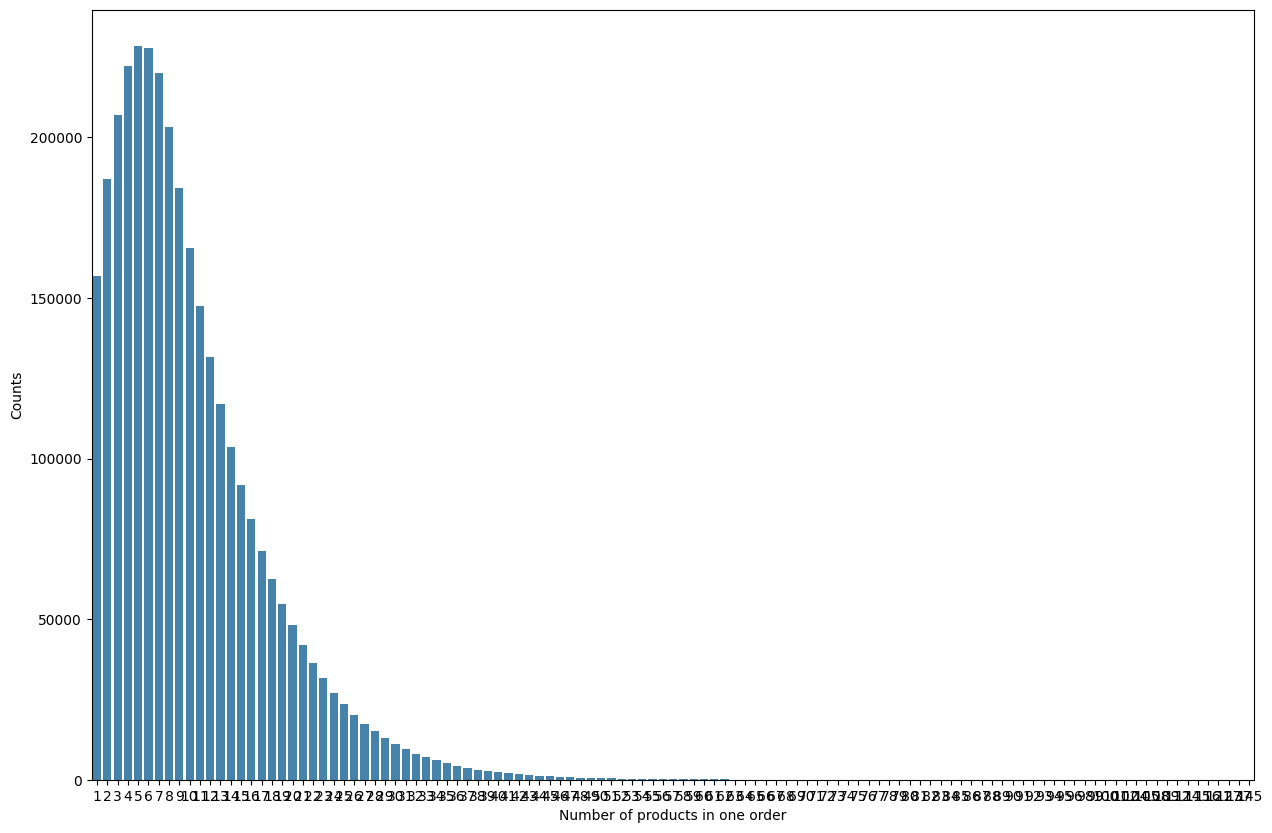

In [155]:
# we draw basket size and orders count relation 

basket_size_cnt = df_order_products_prior.groupby("order_id")["add_to_cart_order"].aggregate(max).value_counts()

f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=basket_size_cnt.index, y= basket_size_cnt.values, alpha = 0.9, color = color[0])
plt.ylabel('Counts')
plt.xlabel('Number of products in one order')

In [156]:
# We calculate average basket size

print("Average basket size:{}".format(df_order_products_prior.groupby("order_id")["add_to_cart_order"].aggregate(max).mean()))

/var/folders/wz/1dc388d16yj3tv2tpcbmbv100000gp/T/ipykernel_1653/4294445152.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  print("Average basket size:{}".format(df_order_products_prior.groupby("order_id")["add_to_cart_order"].aggregate(max).mean()))


Average basket size:10.088883421247614


In [157]:
df_order_products_train = pd.merge(df_order_products_train, df_orders, on='order_id', how='left')
grouped_df = df_order_products_train.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

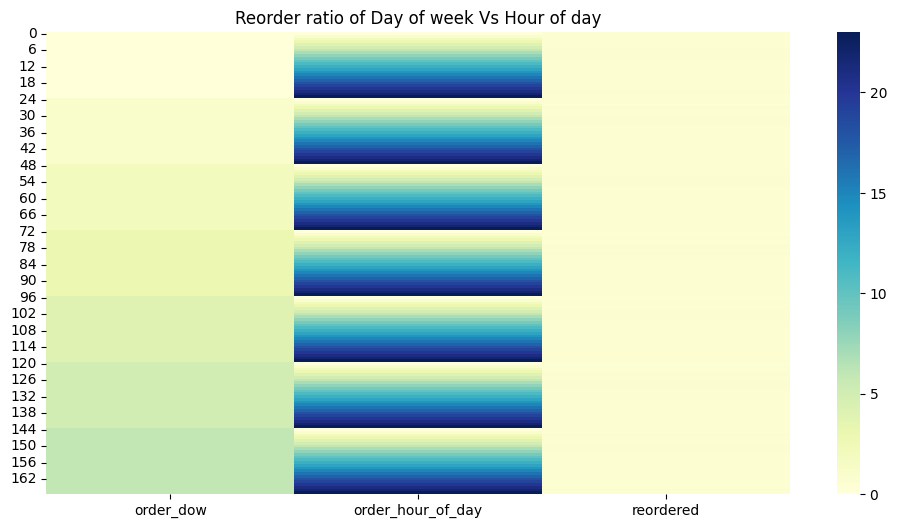

In [158]:
# We create a heat map to display the correlation between the time of day and day of the week.

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df, cmap="YlGnBu")
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

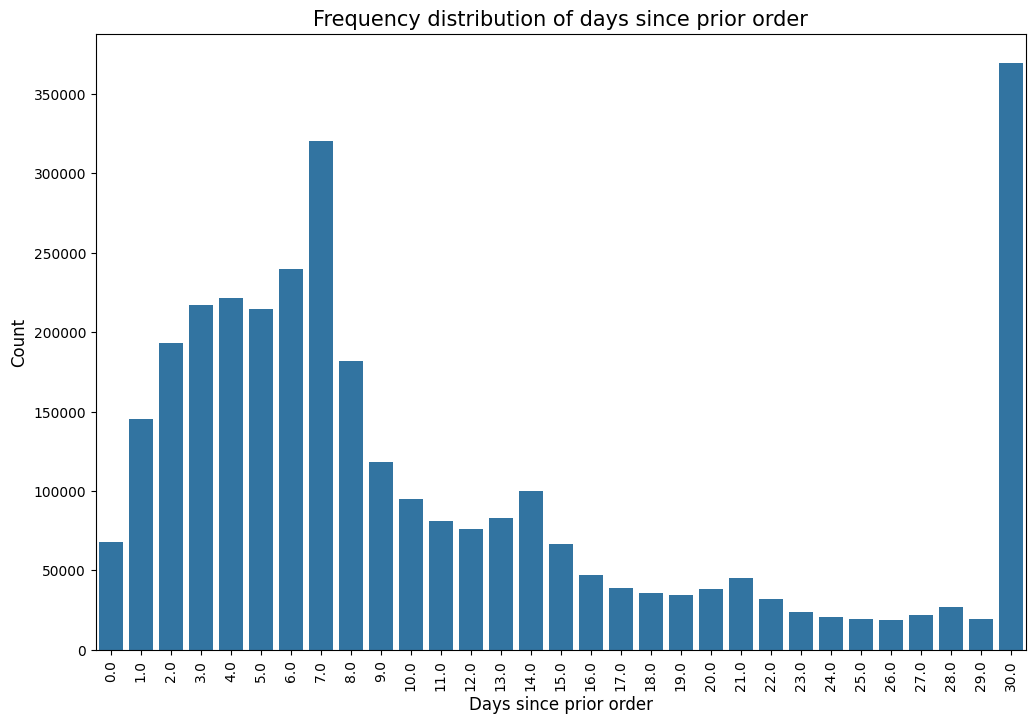

In [159]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=df_orders, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution of days since prior order", fontsize=15)
plt.show()

In [284]:
df_order_products_prior = pd.read_csv("/Users/data/Desktop/instacart-market-basket-analysis/csvs/order_products__prior.csv")

In [285]:
# We indicate popular products
df_order_products_prior = pd.merge(df_order_products_prior, df_products, on = 'product_id', how = 'left')
df_order_products_prior = pd.merge(df_order_products_prior, df_departments, on = 'department_id', how = 'left')
top_products = df_order_products_prior['product_name'].value_counts().reset_index().head(20)
top5department = df_order_products_prior['department'].value_counts().reset_index().head(5)
top_products.columns = ['product_name', 'frequency_count']

Text(0.5, 0, 'Number of Orders Containing This Product')

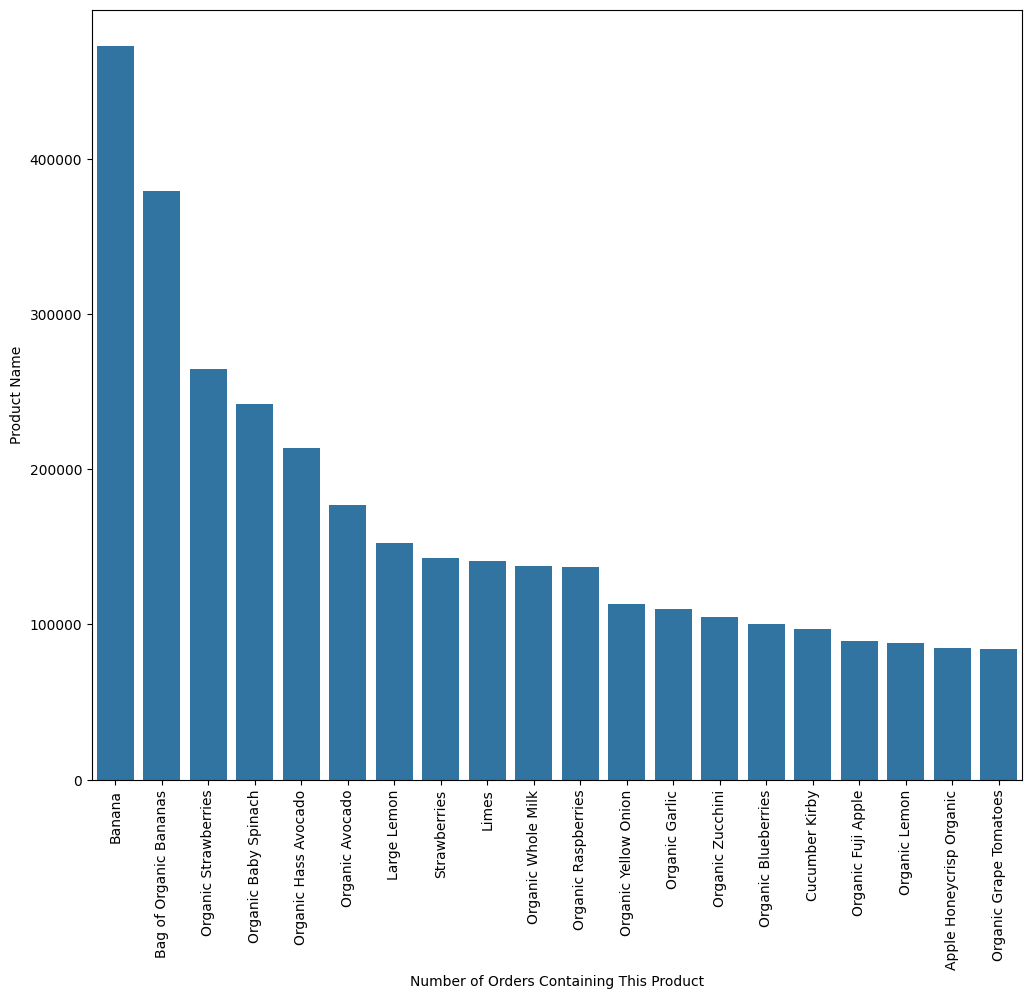

In [286]:
# figure 7

f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(y=top_products.frequency_count, x=top_products.product_name, color = color[0])
plt.ylabel('Product Name')
plt.xlabel('Number of Orders Containing This Product')

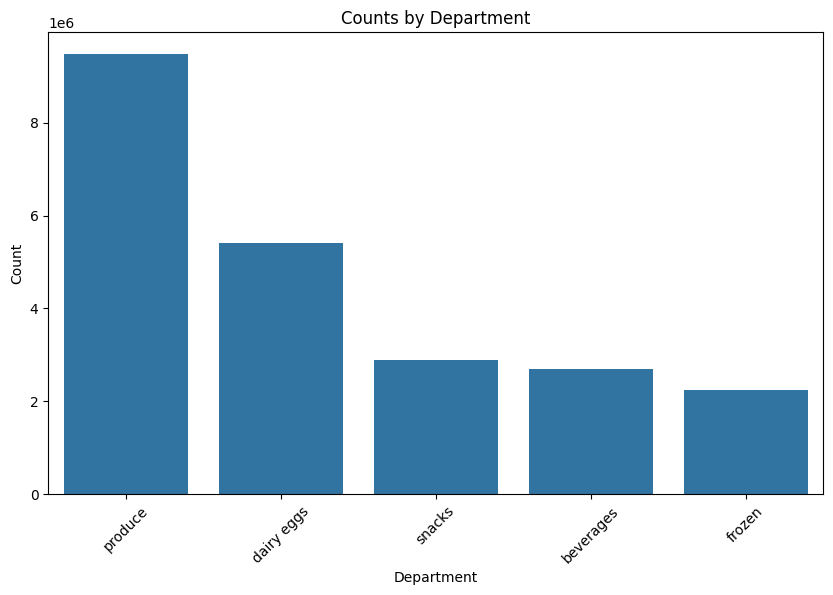

In [289]:
plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='count', data=top5department, color=color[0])
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Counts by Department')
plt.xticks(rotation=45)  # Eğer departman isimleri birbirine çok yakınsa, bu kullanılabilir
plt.show()


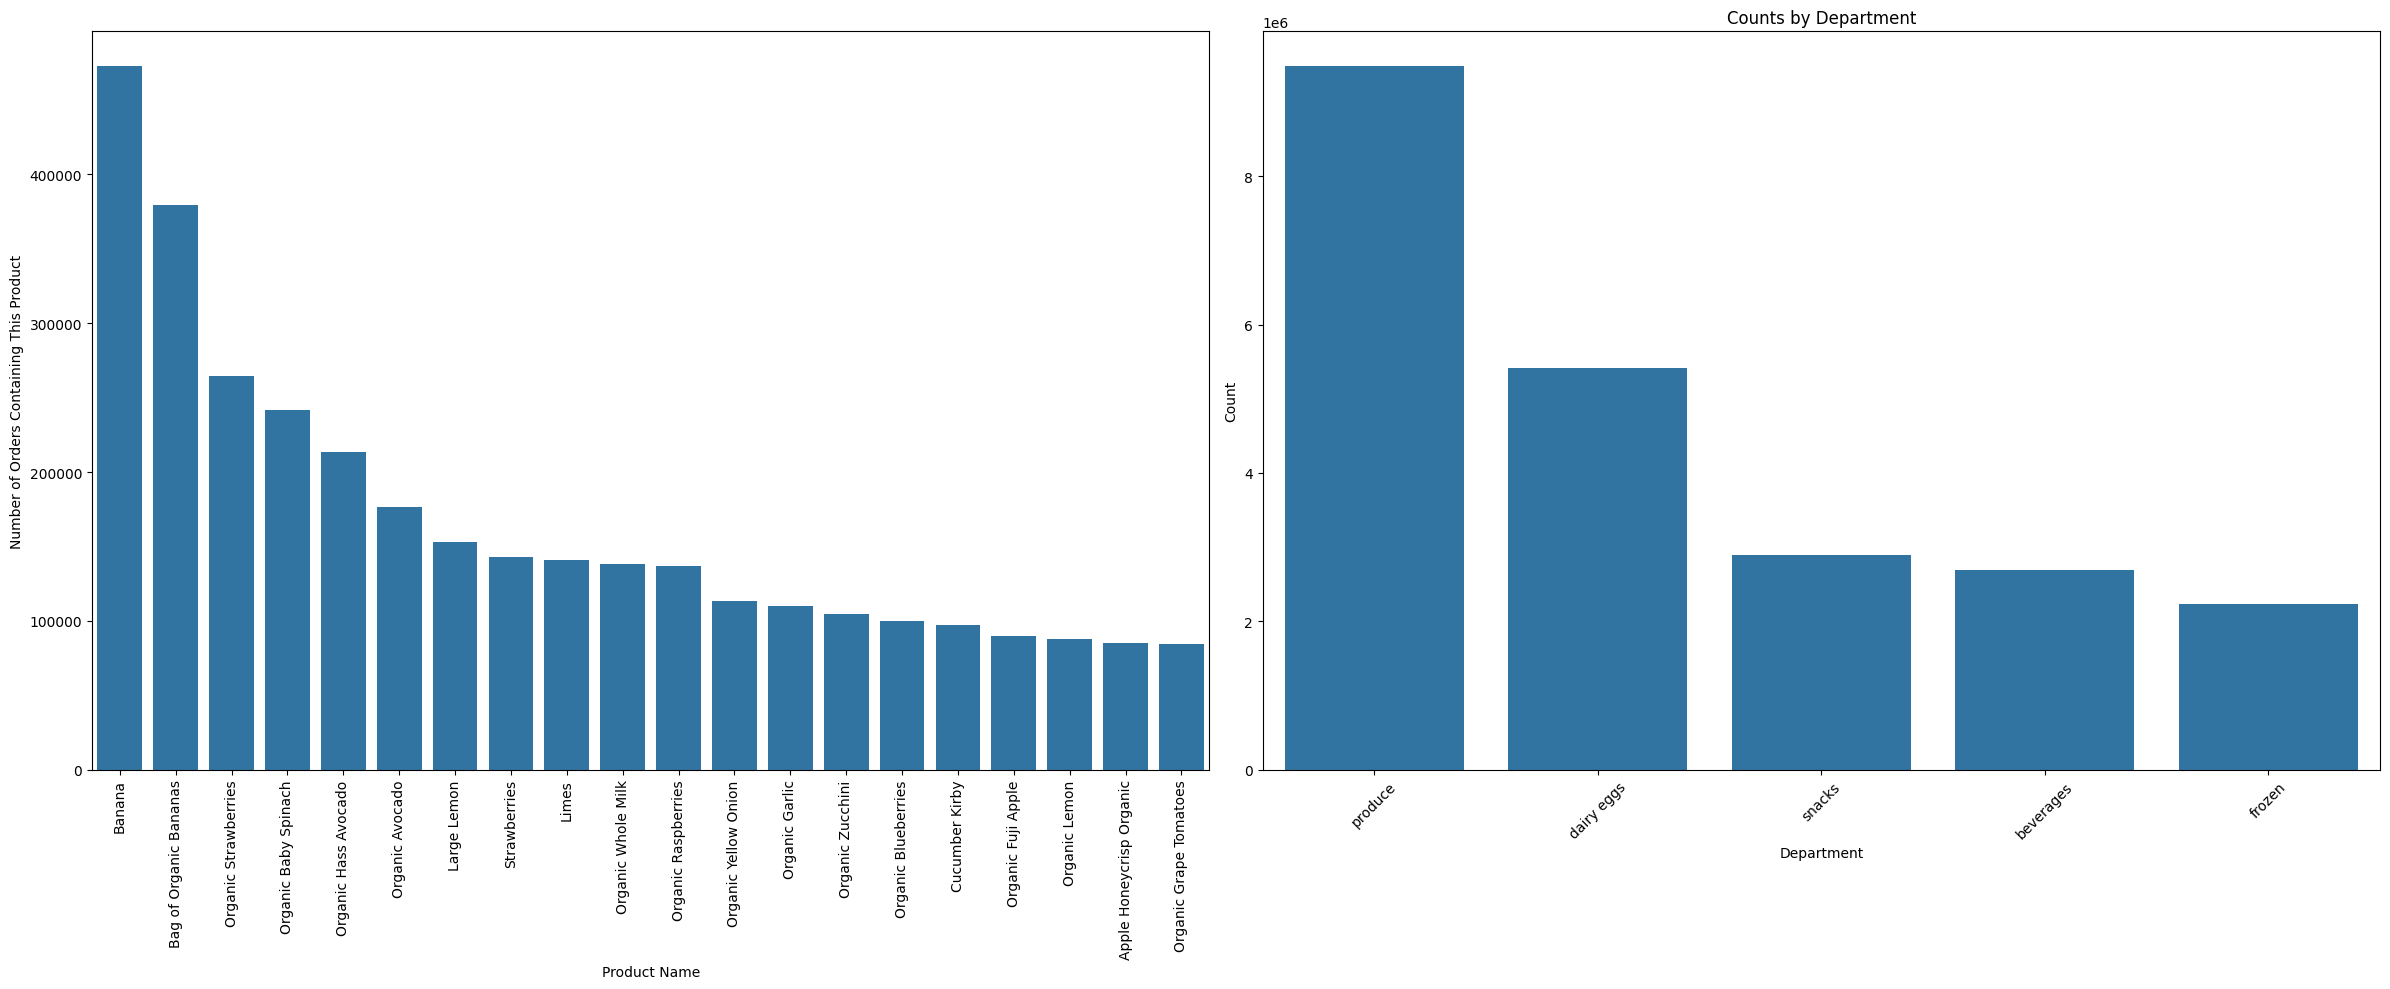

In [290]:
# merging two table 
import matplotlib.pyplot as plt
import seaborn as sns

# Örnek veri setlerini varsayıyorum: top_products ve top5department
# Burada 'color' değişkeninizin tanımlı olduğundan emin olun

# Figür ve eksenleri oluşturma
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))

# İlk grafik (top_products)
sns.barplot(y='frequency_count', x='product_name', data=top_products, color=color[0], ax=axes[0])
axes[0].set_xlabel('Product Name')
axes[0].set_ylabel('Number of Orders Containing This Product')
axes[0].tick_params(axis='x', rotation=90)  # Eksen etiketlerini dikey yap

# İkinci grafik (top5department)
sns.barplot(x='department', y='count', data=top5department, color=color[0], ax=axes[1])
axes[1].set_xlabel('Department')
axes[1].set_ylabel('Count')
axes[1].set_title('Counts by Department')
axes[1].tick_params(axis='x', rotation=45)

# Gösterim
plt.tight_layout()  # Grafiklerin düzgün sığdırılması için
plt.show()
